# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [76]:
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/IDCAMP/hasil_clustering.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single,Cluster
0,-1.017296,0.288572,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,...,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103,2
1,-1.273722,-0.262502,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,...,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103,3
2,-0.333495,0.918191,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,...,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783,1
3,1.290534,-1.182891,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,...,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783,0
4,1.034108,0.295814,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,...,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year_Birth                      2237 non-null   float64
 1   Income                          2237 non-null   float64
 2   Kidhome                         2237 non-null   float64
 3   Teenhome                        2237 non-null   float64
 4   Recency                         2237 non-null   float64
 5   MntWines                        2237 non-null   float64
 6   MntFruits                       2237 non-null   float64
 7   MntMeatProducts                 2237 non-null   float64
 8   MntFishProducts                 2237 non-null   float64
 9   MntSweetProducts                2237 non-null   float64
 10  MntGoldProds                    2237 non-null   float64
 11  NumDealsPurchases               2237 non-null   float64
 12  NumWebPurchases                 22

<Axes: >

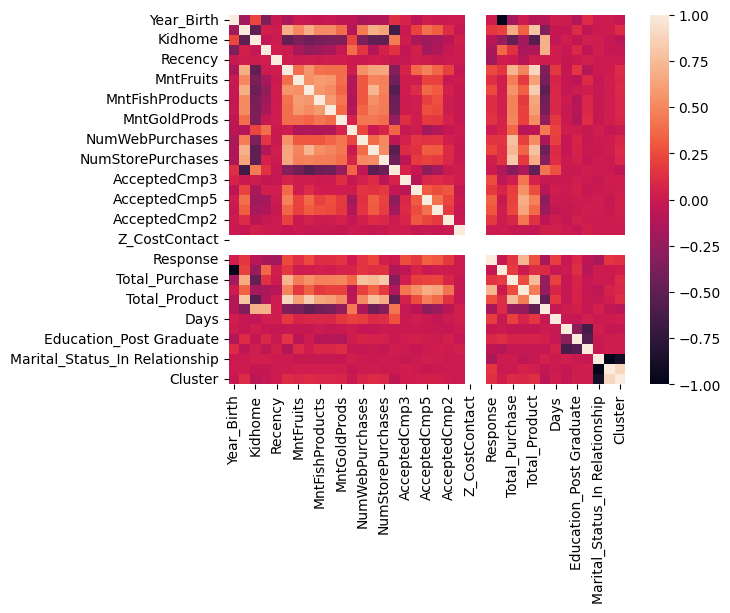

In [78]:
sns.heatmap(df.corr())

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [79]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single,Cluster
0,-1.017296,0.288572,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,...,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103,2
1,-1.273722,-0.262502,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,...,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103,3
2,-0.333495,0.918191,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,...,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783,1
3,1.290534,-1.182891,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,...,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783,0
4,1.034108,0.295814,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,...,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783,0


In [80]:
X = df.drop(columns=['Year_Birth','Z_CostContact','Z_Revenue','Cluster'])
y = df['Cluster']

In [81]:
y.value_counts()

,count
Cluster,
0,819
1,624
3,429
2,365


In [82]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchase,Total_AcceptedCmp,Total_Product,Kids,Days,Education_Graduate,Education_Post Graduate,Education_Undergraduate,Marital_Status_In Relationship,Marital_Status_Single
0,0.288572,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,...,1.319785,0.620785,1.680649,-1.264618,1.530038,-0.585438,-0.526143,0.945599,-1.348103,1.348103
1,-0.262502,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,...,-1.155824,-0.501847,-0.961838,1.395420,-1.191484,-0.585438,-0.526143,0.945599,-1.348103,1.348103
2,0.918191,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,...,0.798604,-0.501847,0.282956,-1.264618,-0.206788,-0.585438,-0.526143,0.945599,0.741783,-0.741783
3,-1.182891,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,...,-0.895234,-0.501847,-0.918627,0.065401,-1.062830,-0.585438,-0.526143,0.945599,0.741783,-0.741783
4,0.295814,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,...,0.538014,-0.501847,-0.305371,0.065401,-0.953970,-0.585438,1.900624,-1.057531,0.741783,-0.741783


In [83]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1789, 33), y_train=(1789,)
Test set shape: X_test=(448, 33), y_test=(448,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [84]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Algoritma yang digunakan adalah K-Nearest Neighbors dan Support Vector Machine (SVM). KNN bekerja dengan mencari K tetangga terdekat, sedangkan SVM mencoba untuk menemukan hyperplane (batas pemisah) terbaik yang memisahkan data ke dalam kelas yang berbeda. Pemilihan kedua metode tersebut untuk memastikan klaim bahwa SVM dapat menangani klasifikasi lebih baik pada data dengan kompleksitas yang lebih tinggi.

In [85]:
from sklearn.metrics import accuracy_score

#KNN Model Accuracy on Training Set
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
# SVM Model Accuracy on Training Set
svm_accuracy = svm.score(X_train, y_train)
print(f"SVM Training Accuracy: {svm_accuracy:.4f}")


K-Nearest Neighbors Accuracy: 0.9576
SVM Training Accuracy: 0.9927


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.97206704 0.98044693 0.97486034 0.96927374 0.95798319]
Mean Accuracy: 0.9709262475940097


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [87]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred,average='macro'),
        'F1-Score': f1_score(y_test, y_pred,average='macro')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.957589   0.960827  0.955940  0.958245
1  Support Vector Machine (SVM)  0.966518   0.973014  0.968158  0.970030


In [88]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[153   5   0   0]
 [  7 126   1   0]
 [  0   3  63   2]
 [  0   0   1  87]]


In [89]:
print(confusion_matrix(y_test, svm.predict(X_test)))

[[149   9   0   0]
 [  2 132   0   0]
 [  0   2  65   1]
 [  0   1   0  87]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       158
           1       0.94      0.94      0.94       134
           2       0.97      0.93      0.95        68
           3       0.98      0.99      0.98        88

    accuracy                           0.96       448
   macro avg       0.96      0.96      0.96       448
weighted avg       0.96      0.96      0.96       448



In [91]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       158
           1       0.92      0.99      0.95       134
           2       1.00      0.96      0.98        68
           3       0.99      0.99      0.99        88

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



Terlihat bahwa algoritma SVM memiliki nilai metrik evaluasi yang lebih baik dibandingkan KNN, dengan nilai akurasi sebesar 0.966518,  Presisi 0.973014, recall 0.968158, F1-score 0.970030.


Sementara itu, KNN memiliki metrik evaluasi sebagai berikut :
nilai akurasi sebesar 0.957589,  Presisi  0.960827, recall 0.955940, F1-score 0.958245.

Hal tersebut sejalan dangan karakteristik dataset yang kompleks, di mana SVM lebih cocok digunakan untuk data dengan kompleksitas yang lebih tinggi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [92]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [93]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Dari hasil yang diberikan oleh kedua metode (KNN dan SVM) terlihat nilai metrik evaluasi yang diberikan tergolong cukup tinggi dan hampir sempurna. Hal tersebut dapat mengindikasikan model mengalami overfitting pada dataset yang diberikan. Untuk menangani hal tersebut, dapat dilakukan penambahan data latih agar model dapat menangkap pola - pola yang terdapat dalam data dengan lebih baik. Selain itu, dapat menggunakan algoritma klasifikasi yang lebih sederhana atau menggunakan feature selection untuk menghilangkan fitur yang tidak relevan.